# Covid-19 Research Article Dataset Analysis

In [6]:
import os
import zipfile
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re
import string
import gdown

folder_id = "1GpqxmFbpF97LhOyIoh08BXbNfWM56YIg"
url = f"https://drive.google.com/drive/folders/{folder_id}"

output_dir = "data"
os.makedirs(output_dir, exist_ok=True)

# downloading folder using gdown
gdown.download_folder(id=folder_id, output=output_dir, quiet=False, use_cookies=False)

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

Retrieving folder contents


Processing file 1HI1VuIfHh9WlJ5vj0Jat9CwBAgAYjRDv metadata.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1HI1VuIfHh9WlJ5vj0Jat9CwBAgAYjRDv
From (redirected): https://drive.google.com/uc?id=1HI1VuIfHh9WlJ5vj0Jat9CwBAgAYjRDv&confirm=t&uuid=b4ae1aaa-ae52-445b-8962-e46290516275
To: C:\Users\gizem\jupyter\covid_19\data\metadata.csv
100%|██████████| 1.65G/1.65G [04:45<00:00, 5.78MB/s]
Download completed
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gizem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gizem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gizem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [35]:
df = pd.read_csv("data/metadata.csv", low_memory=False)

In [36]:
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [37]:
df[['title', 'abstract']].head()

,title,abstract
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

In [39]:
df.isnull().sum()

cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64

In [40]:
# Taking the data where abstract is not null
df = df[df['abstract'].notnull()]

df = df[['title', 'abstract']].dropna()

# Taking a sample to run the code faster
df = df.head(10000)

## Cleaning and Preprocessing Data

In [42]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_abstract'] = df['abstract'].apply(clean_text)

## Keyword Analysis

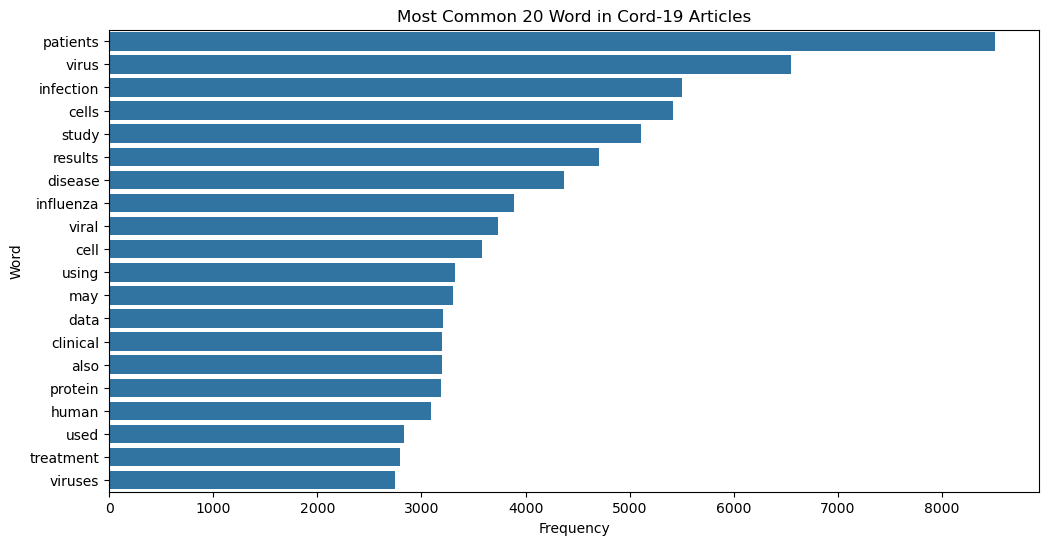

In [44]:
all_text = ' '.join(df['cleaned_abstract'].tolist())

stop_words = set(stopwords.words('english'))
tokens = word_tokenize(all_text)
filtered_words = [w for w in tokens if w not in stop_words and len(w) > 2]

# Finding most common 20 word
word_freq = Counter(filtered_words)
common_words = word_freq.most_common(20)

# Visualization
words, freqs = zip(*common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(freqs), y=list(words))
plt.title("Most Common 20 Word in Cord-19 Articles")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

## Word Cloud

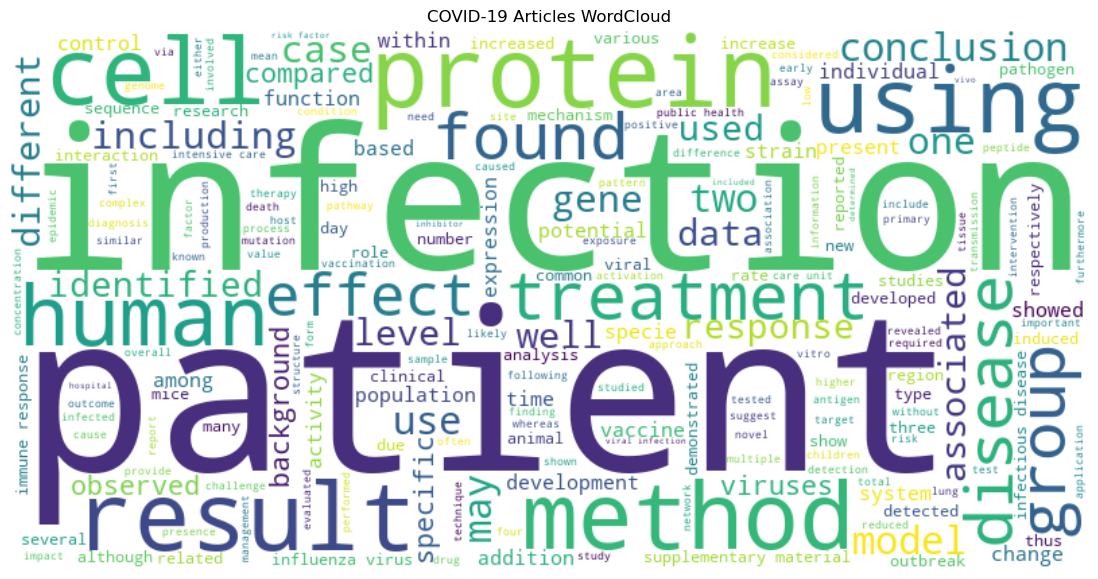

In [46]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("COVID-19 Articles WordCloud")
plt.show()

## Finding Related Articles to Scientific Questions 

In [48]:
# TF-IDF Vectorisation
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_abstract'])

# Function: Finding most related articles to the user's question
def search_question(question, top_n=5):
    cleaned_question = clean_text(question)
    question_vec = vectorizer.transform([cleaned_question])
    
    cosine_similarities = cosine_similarity(question_vec, tfidf_matrix).flatten()
    top_indices = cosine_similarities.argsort()[-top_n:][::-1]
    
    print(f"Most Related {top_n} Article:")
    for idx in top_indices:
        print(f"\nTitle: {df.iloc[idx]['title']}")
        print(f"Abstract: {df.iloc[idx]['abstract'][:500]}...")


In [49]:
search_question("What are the antiviral effects of remdesivir?")

Most Related 5 Article:

Title: Self-Interest versus Group-Interest in Antiviral Control
Abstract: Antiviral agents have been hailed to hold considerable promise for the treatment and prevention of emerging viral diseases like H5N1 avian influenza and SARS. However, antiviral drugs are not completely harmless, and the conditions under which individuals are willing to participate in a large-scale antiviral drug treatment program are as yet unknown. We provide population dynamical and game theoretical analyses of large-scale prophylactic antiviral treatment programs. Throughout we compare the a...

Title: Niclosamide Is a Proton Carrier and Targets Acidic Endosomes with Broad Antiviral Effects
Abstract: Viruses use a limited set of host pathways for infection. These pathways represent bona fide antiviral targets with low likelihood of viral resistance. We identified the salicylanilide niclosamide as a broad range antiviral agent targeting acidified endosomes. Niclosamide is approved for 